In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import time
from datetime import datetime
from tempfile import mkdtemp
from pathlib import Path
import os


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import scipy.stats as st
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from feature_eng import AddFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import numpy as np, pandas as pd, json, traceback
import sklearn, sklearn.metrics as m

## Import data

In [244]:
path = '/users/rutz/Documents/PROG/mentor/housing_prices/data/AmesHousing.csv'
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)

In [245]:
print(len(df.columns))
df.columns

82


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [246]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [247]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Missing data evaluation

In [248]:
missing_ratio = pd.DataFrame(df.isnull().sum(), columns=['missing_value_count'])
missing_ratio.loc[:, '% of dataset'] = np.round(missing_ratio.loc[:, 'missing_value_count'] / df.shape[0] * 100, 2)
missing_ratio.loc[missing_ratio.loc[:, 'missing_value_count']>0, :].sort_values(by='missing_value_count', ascending=False)


#Dropping top3 >90% missing data columns
drop_cols=['Pool QC', 'Misc Feature', 'Alley']
df = df.drop(columns=drop_cols, errors='ignore')

## Skewness

            feature   skewness
35         Misc Val  21.999788
34        Pool Area  16.939142
4          Lot Area  12.820898
16  Low Qual Fin SF  12.118162
32       3Ssn Porch  11.403795
23    Kitchen AbvGr   4.313825
11     BsmtFin SF 2   4.139978
31   Enclosed Porch   4.014446
33     Screen Porch   3.957467
19   Bsmt Half Bath   3.940795
9      Mas Vnr Area   2.606985
30    Open Porch SF   2.535386
29     Wood Deck SF   1.842678
38        SalePrice   1.743500
3      Lot Frontage   1.499067
14       1st Flr SF   1.469429
10     BsmtFin SF 1   1.416182
2       MS SubClass   1.357579
17      Gr Liv Area   1.274110
13    Total Bsmt SF   1.156204
12      Bsmt Unf SF   0.923053
15       2nd Flr SF   0.866457
24    TotRms AbvGrd   0.753543
25       Fireplaces   0.739215
21        Half Bath   0.697713
18   Bsmt Full Bath   0.616639
6      Overall Cond   0.574429
22    Bedroom AbvGr   0.305694
28      Garage Area   0.241994
36          Mo Sold   0.192596
5      Overall Qual   0.190634
20      

/var/folders/yt/b46lgnxd5zg3pv3pnf4dmf1h0000gn/T/ipykernel_11676/991188647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skew_df, x='skewness', y='feature', palette='viridis')


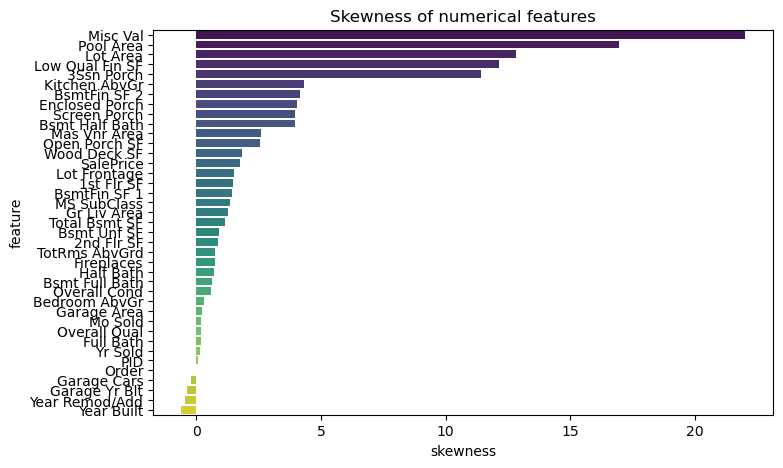

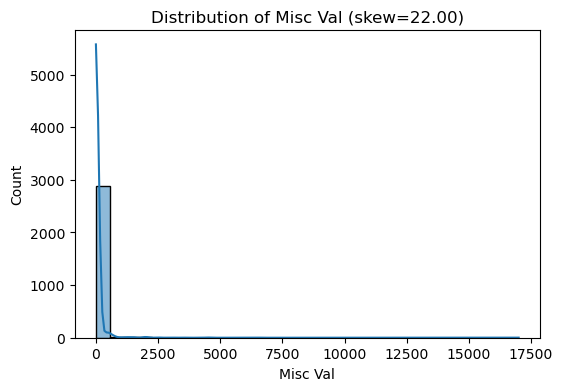

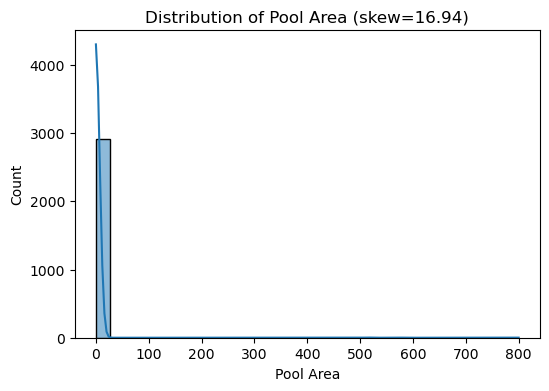

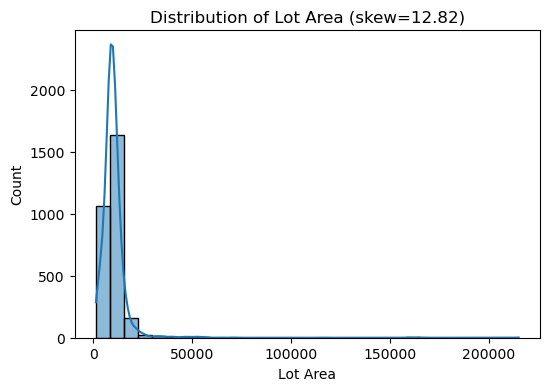

In [249]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_df = df[num_cols].skew().reset_index()
skew_df.columns = ['feature', 'skewness']

skew_df = skew_df.sort_values('skewness', ascending=False)
print(skew_df)

plt.figure(figsize=(8,5))
sns.barplot(data=skew_df, x='skewness', y='feature', palette='viridis')
plt.title('Skewness of numerical features')
plt.savefig('Skewness_of_num_features.png')

top_skewed = skew_df.head(3)['feature']

for col in top_skewed:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (skew={df[col].skew():.2f})')

## Train_test split

In [251]:
y = df['SalePrice']
X_raw = df.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42)

## Feature Engineering

In [252]:
feature_eng = AddFeatures()
        

In [254]:
#it isnt obvious how did i get ord_cols

ord_cols = [
    'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Heating QC', 'Kitchen Qual', 'Fireplace Qu',
    'Garage Qual', 'Garage Cond'
]

qual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']


num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numerical Features: {len(num_cols)}')
print(f'Categorical Features: {len(cat_cols)}')

Numerical Features: 38
Categorical Features: 40


In [255]:
num_tf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scale', StandardScaler())
])

cat_tf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ord_tf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[qual_order]*len(ord_cols)))
])

preproc = ColumnTransformer(
    transformers=[
        ('num', num_tf, num_cols),
        ('ord', ord_tf, ord_cols),
        ('cat', cat_tf,  [c for c in cat_cols if c not in ord_cols])
    ],
    remainder='drop'
)


## Pipeline

In [256]:
def make_pipeline(model):
    return Pipeline(steps=[
        ('fe', feature_eng),
        ('preproc', preproc),
        ('model', model)
    ], memory = cachedir)

In [257]:
model_zoo = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(random_state=42, n_estimators=300),
    'XGB': XGBRegressor(
        random_state=42, n_estimators=600, learning_rate=0.05,
        max_depth=4, subsample=0.9, colsample_bytree=0.9,
        objective='reg:squarederror', n_jobs=-1
    ),
}

## GridSearch parameters

In [258]:
param_grids = {
    'Ridge': {
        'model__alpha': [0.1, 1.0, 3.0, 10.0]
    },
    'Lasso': {
        'model__alpha': [0.0005, 0.001, 0.01]
    },
    'ElasticNet': {
        'model__alpha': [0.0005, 0.001, 0.01],
        'model__l1_ratio': [0.2, 0.5, 0.8]
    },
    'RandomForest': {
        'model__n_estimators': [300, 600],
        'model__max_depth': [None, 8, 12],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['sqrt', 'log2', None],
    },
    'XGB': {
        'model__n_estimators': [400, 800],
        'model__max_depth': [3, 4, 6],
        'model__learning_rate': [0.03, 0.05, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__reg_alpha': [0, 0.001, 0.01],
        'model__reg_lambda': [1, 2],
    },
}

## Main functions (scorer, run_gs, log)

In [259]:
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

def evaluate_holdout(model, X_test, y_test):
    y_hat = model.predict(X_test)
    return {
        'rmse': rmse(y_test, y_hat),
        'mae': mean_absolute_error(y_test, y_hat),
        'r2': r2_score(y_test, y_hat),
    }

def neg_rmse_scorer(y_train, y_pred):
    return -np.sqrt(mean_squared_error(y_train, y_pred))

rmse_scorer = make_scorer(neg_rmse_scorer)

def run_grid_search(model_name, X_train, y_train, cv_splits=5, scoring='net_root_mean_squared_error'):
    pipe = make_pipeline(model_zoo[model_name])
    param_grid = param_grids.get(model_name, {})
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=rmse_scorer,
        cv=cv,
        n_jobs=-1,
        verbose=1,
        refit=True,
        error_score="raise" 
    )
    gs.fit(X_train, y_train)
    
    joblib.dump(gs, f'artifacts/{name}_grid.pkl')
    joblib.dump(gs.best_estimator_, f'artifacts/{name}_best.pkl')
    
    
    cvres = pd.DataFrame(gs.cv_results_)
    cvres.to_csv(f'artifacts/{name}_cv_results.csv', index=False)
    
    summary = pd.DataFrame(results_summary)
    summary.to_csv('artifacts/summary_baseline.csv', index=False)
    return gs

def append_log(row: dict, path='experiments_log.csv'):
    row = row.copy()
    row['timestamp'] = datetime.now().isoformat(timespec='seconds')
    
    if isinstance(row.get('best_params'), dict):
        row['best_params'] = json.dumps(row['best_params'], ensure_ascii=False)
        df = pd.DataFrame([row])
        try:
            old = pd.read_csv(path)
            out = pd.concat([old, df], ignore_index=True)
        except FileNotFoundError:
            out = df
        out.to_csv(path, index=False)
        return out.tail(1)
    


In [260]:
SEED = 42
np.random.seed(SEED)
cv = KFold(n_splits=3, shuffle=True, random_state=SEED)

In [261]:
meta = {
    'dataset': 'Ames',
    'target': 'SalePrice',
    'seed': SEED,
    'cv': 3,
    'X_shape': X_train.shape,
    'y_shape': y_train.shape,
}
joblib.dump(meta, 'artifacts/meta.pkl')

['artifacts/meta.pkl']

In [262]:
cachedir = mkdtemp()

## GridSearch (fast models)

In [263]:
best_models = {}
grid_results = {}
results_summary = []
for name in ['Ridge', 'Lasso', 'RandomForest', 'XGB']:
    print(f'\n=== GridSearchCV: {name} ===')
    gs = run_grid_search(name, X_train, y_train, cv_splits=3, scoring='neg_root_mean_squared_error')
    best = gs.best_estimator_
    cv_rmse = -gs.best_score_
    hold = evaluate_holdout(best, X_test, y_test)
    row = {
        'dataset': 'Ames',
        'target': 'SalePrice',
        'model': name,
        'cv_splits': 3,
        'cv_rmse': cv_rmse,
        'test_rmse': hold['rmse'],
        'test_mae': hold['mae'],
        'test_r2': hold['r2'],
        'best_params': gs.best_params_
    }
    append_log(row)
    results_summary.append(row)
    
    best_models[name] = best
    grid_results[name] = gs
    
summary_df = pd.DataFrame(results_summary).sort_values('test_rmse')
print(summary_df[['model', 'cv_rmse', 'test_rmse', 'test_mae', 'test_r2']])


=== GridSearchCV: Ridge ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits

=== GridSearchCV: Lasso ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e+11, tolerance: 9.323e+08
  model = cd_fast.enet_coordinate_descent(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.145e+11, tolerance: 9.533e+08
  model = cd_fast.enet_coordinate_descent(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi


=== GridSearchCV: RandomForest ===
Fitting 3 folds for each of 72 candidates, totalling 216 fits

=== GridSearchCV: XGB ===
Fitting 3 folds for each of 216 candidates, totalling 648 fits
          model       cv_rmse     test_rmse      test_mae   test_r2
3           XGB  24396.160768  23126.962965  14008.878906  0.933289
2  RandomForest  27425.382222  26621.836286  15804.752610  0.911604
0         Ridge  30062.556995  31011.940798  18624.860523  0.880046
1         Lasso  31078.171087  31371.317353  18815.394398  0.877249


## Feature Importance XGB

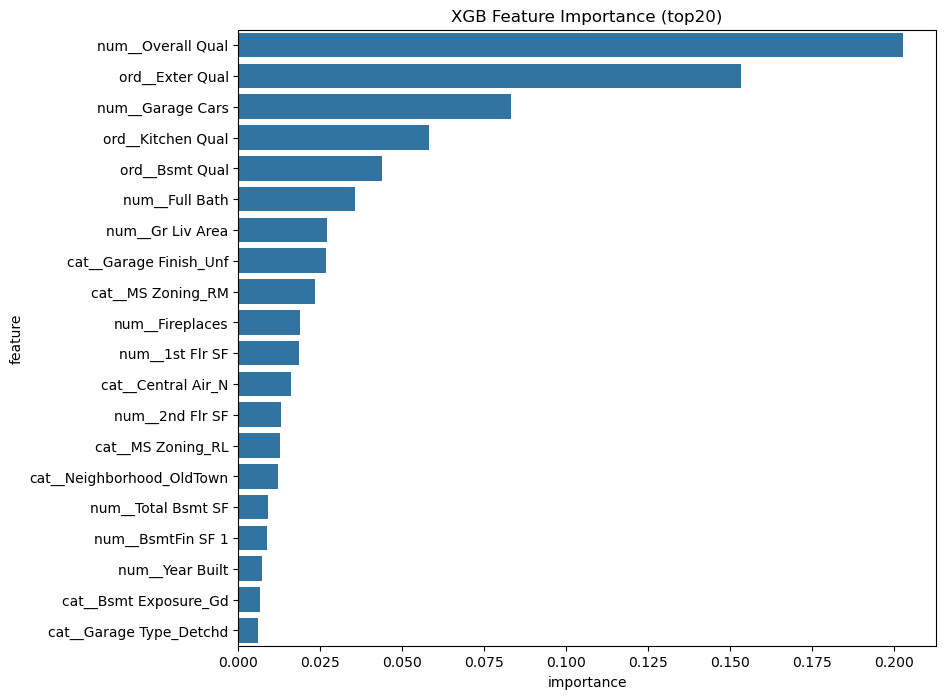

In [266]:
feature_names = best.named_steps['preproc'].get_feature_names_out()
xgb = best.named_steps['model']
importances = xgb.feature_importances_

fi_df = (pd.DataFrame({'feature': feature_names, 'importance': importances})
        .sort_values('importance', ascending=False))

plt.figure(figsize=(9, 8))
sns.barplot(x='importance', y='feature', data=fi_df.head(20))
plt.title('XGB Feature Importance (top20)')
plt.savefig('xgb_feature_importance(top20.png')

In [267]:
summary_df.to_csv("artifacts/summary_baseline.csv", index=False)

In [269]:
summary_df

,dataset,target,model,cv_splits,cv_rmse,test_rmse,test_mae,test_r2,best_params
3,Ames,SalePrice,XGB,3,24396.160768,23126.962965,14008.878906,0.933289,"{'model__learning_rate': 0.03, 'model__max_dep..."
2,Ames,SalePrice,RandomForest,3,27425.382222,26621.836286,15804.752610,0.911604,"{'model__max_depth': None, 'model__max_feature..."
0,Ames,SalePrice,Ridge,3,30062.556995,31011.940798,18624.860523,0.880046,{'model__alpha': 10.0}
1,Ames,SalePrice,Lasso,3,31078.171087,31371.317353,18815.394398,0.877249,{'model__alpha': 0.01}


## GridSearch for LGBM and CatBoost

In [270]:
try:
    model_zoo
except NameError:
    model_zoo = {}

model_zoo.update({
    "LightGBM": LGBMRegressor(
        objective="rmse",
        random_state=42,
        n_estimators=800,
        learning_rate=0.05,
        num_leaves=31,
        max_depth=-1,    
        min_child_samples=20,
        subsample=0.9,
        colsample_bytree=0.9,
        verbose=-1          
    ),
    "CatBoost": CatBoostRegressor(
        loss_function="RMSE",
        random_seed=42,
        allow_writing_files=False,
        verbose=0,
        thread_count=-1         
    ),
})


try:
    param_grids
except NameError:
    param_grids = {}

param_grids.update({
    "LightGBM": {
        "model__n_estimators": [500, 1000],
        "model__num_leaves": [31, 63],
        "model__max_depth": [-1, 5],
        "model__learning_rate": [0.03, 0.05],
        "model__subsample": [0.8, 1.0],
        "model__colsample_bytree": [0.8, 1.0],

    },
    "CatBoost": {
        "model__iterations": [600, 1000],
        "model__depth": [6, 8],
        "model__learning_rate": [0.03, 0.05],
      
    },
})


best_models = {}
grid_results = {}
summary = []

for name in ["LightGBM", "CatBoost"]:
    print(f"\n=== GridSearchCV: {name} ===")
    pipe = make_pipeline(model_zoo[name]) 


    n_jobs = 1 if name == "CatBoost" else -1

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        scoring=rmse_scorer,
        cv=cv,
        n_jobs=n_jobs,
        verbose=2,
        refit=True,
        error_score="raise"
    )


    gs.fit(X_train, y_train)


    best = gs.best_estimator_
    hold = evaluate_holdout(best, X_test, y_test)

    best_models[name] = best
    grid_results[name] = gs

    row = {
        "dataset": "Ames",
        "target":  "SalePrice",
        "model":   name,
        "cv_splits": 5,
        "cv_rmse":  -gs.best_score_,        
        "test_rmse": hold["rmse"],
        "test_mae":  hold["mae"],
        "test_r2":   hold["r2"],
        "best_params": gs.best_params_,
        "notes": "GridSearch (CatBoost with n_jobs=1)" if name=="CatBoost" else "",
    }
    summary.append(row)
    append_log(row)


summary_df = pd.DataFrame(summary).sort_values("test_rmse")
print(summary_df[["model","cv_rmse","test_rmse","test_mae","test_r2"]])


=== GridSearchCV: LightGBM ===
Fitting 5 folds for each of 64 candidates, totalling 320 fits


/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 


=== GridSearchCV: CatBoost ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.03; total time=   1.8s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.03; total time=   1.3s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.03; total time=   1.3s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.03; total time=   1.3s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.03; total time=   1.6s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.05; total time=   1.5s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.05; total time=   1.4s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.05; total time=   1.4s
[CV] END model__depth=6, model__iterations=600, model__learning_rate=0.05; total time=   1.3s
[CV] END model__depth=6, model__iterations=600, model__learnin

## Saving the best models

In [272]:
best_cb = best_models["CatBoost"]
best_lgbm = best_models["LightGBM"]

joblib.dump(best_cb,   "/users/rutz/Documents/PROG/mentor/housing_prices/models/best_catboost.joblib")
joblib.dump(best_lgbm, "/users/rutz/Documents/PROG/mentor/housing_prices/models/best_lightgbm.joblib")

['/users/rutz/Documents/PROG/mentor/housing_prices/models/best_lightgbm.joblib']

## Catboost / LGBM Feature Importance

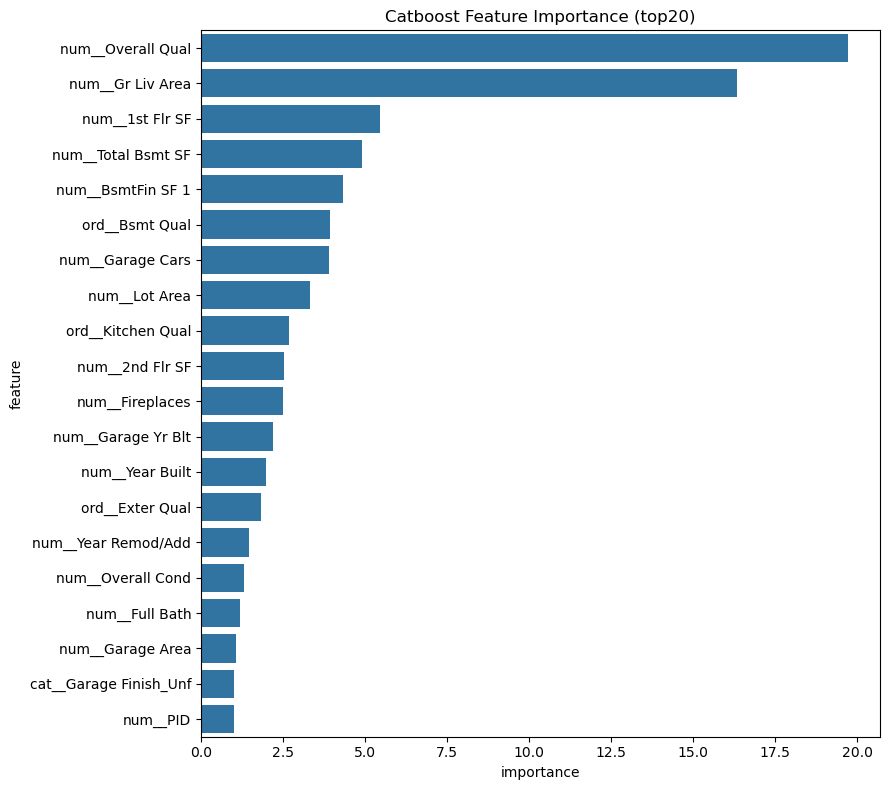

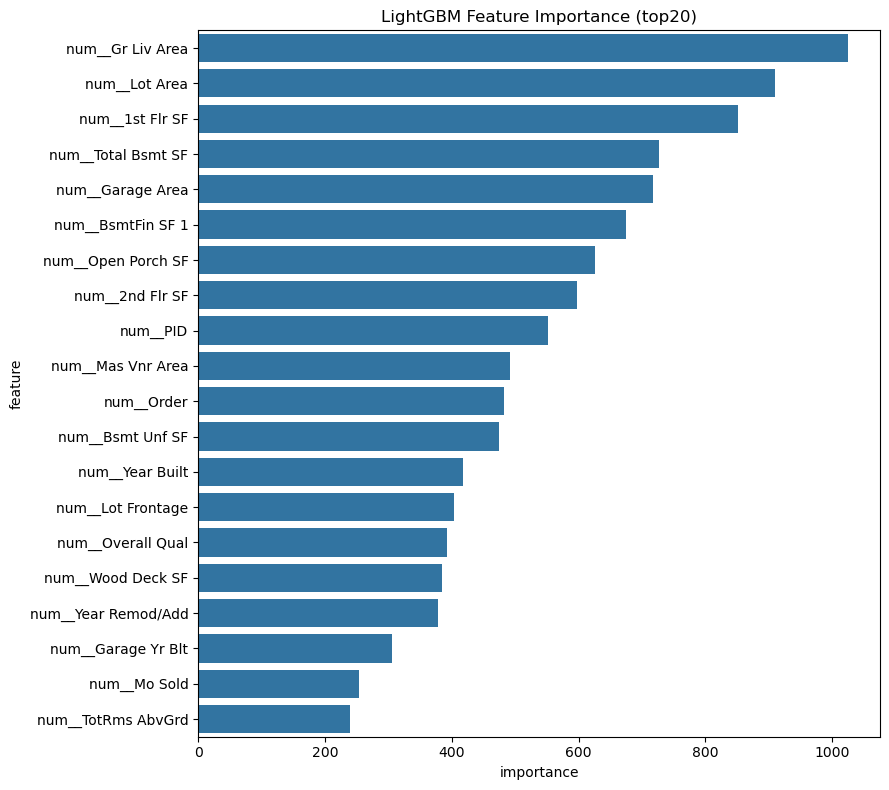

In [276]:
feat_names = best_cb.named_steps['preproc'].get_feature_names_out()

cb_imp = pd.DataFrame({
    'feature': feat_names,
    'importance': best_cb.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(9,8))
sns.barplot(x='importance', y='feature', data=cb_imp.head(20))
plt.title('Catboost Feature Importance (top20)')
plt.tight_layout()
plt.savefig('Catboost_Feature_Importance_(top20).png', dpi=300)

lgbm_imp = pd.DataFrame({
    'feature': feat_names,
    'importance': best_lgbm.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(9,8))
sns.barplot(x='importance', y='feature', data=lgbm_imp.head(20))
plt.title('LightGBM Feature Importance (top20)')
plt.tight_layout()
plt.savefig('LightGBM_Feature_Importance_(top20).png', dpi=300)

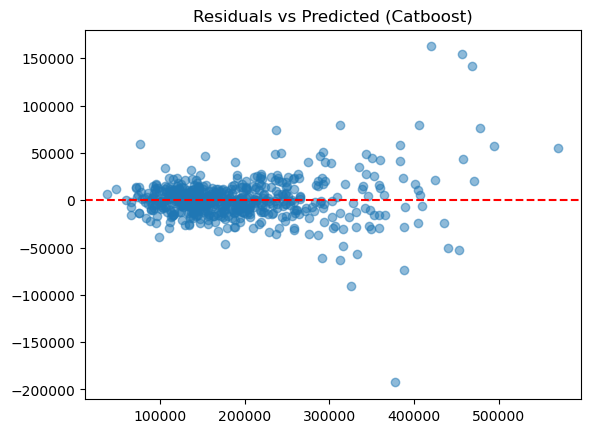

In [312]:
best_cat = best_models['CatBoost']
y_pred = best_cat.predict(X_test)

resid = y_test - y_pred

plt.figure()
plt.scatter(y_pred, resid, alpha=0.5)
plt.axhline(0, ls='--', color='red')
plt.xlabel=('Predicted price, $')
plt.ylabel=('Residual, $')
plt.title('Residuals vs Predicted (Catboost)')
plt.savefig('plots/Residuals_vs_Predicted_(Catboost).png')

## Permutation Importance (Catboost / LGBM)

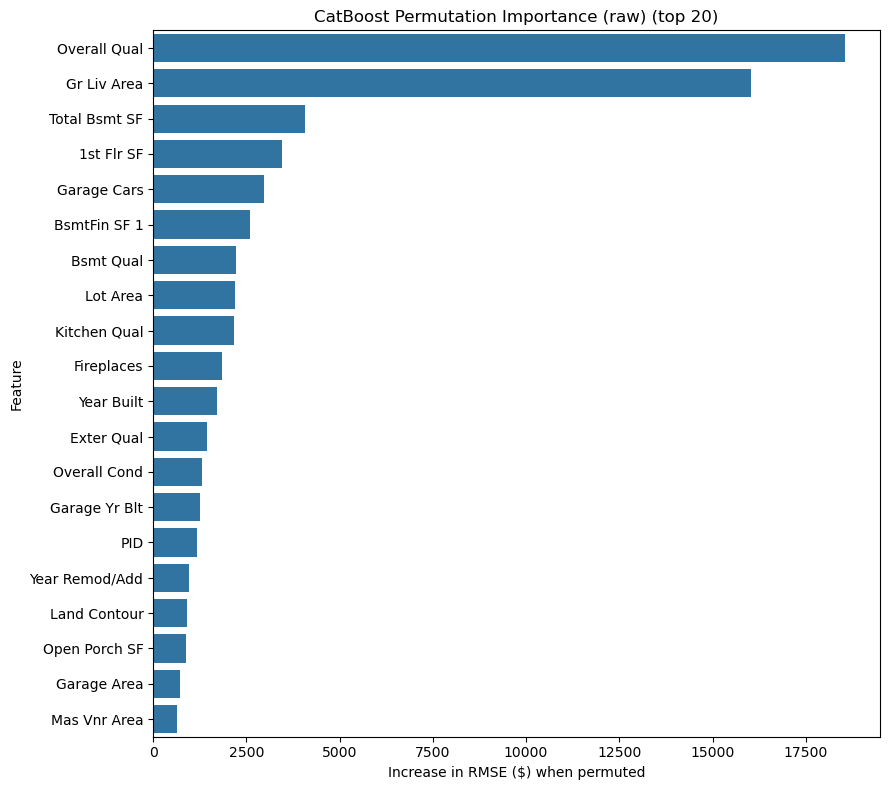

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have vali

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have vali

  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have vali

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, 

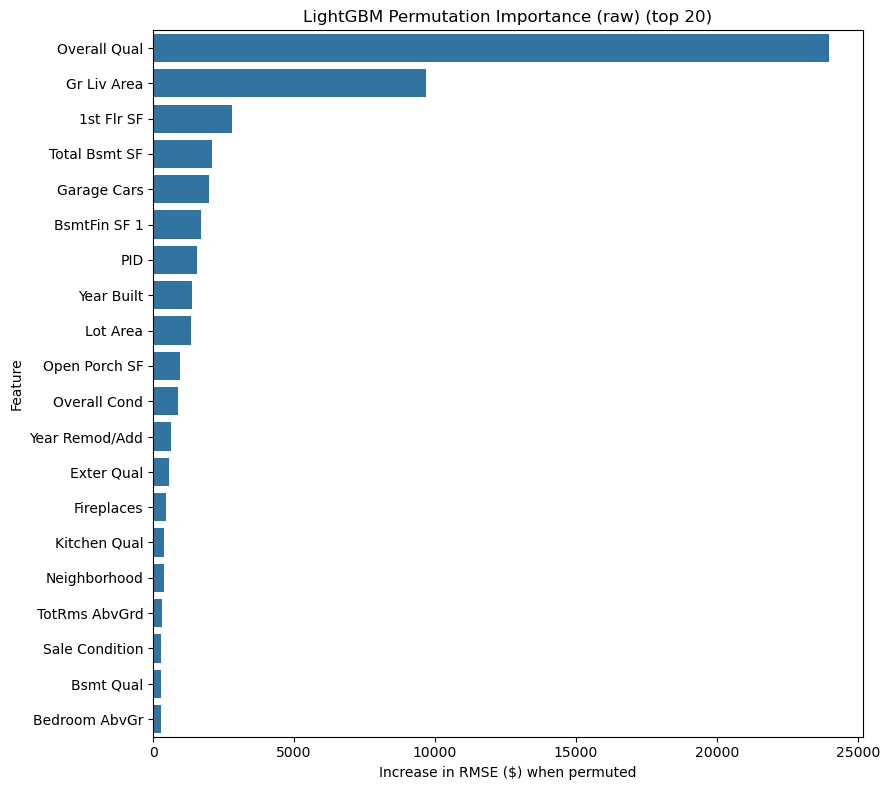

In [291]:

def permutation_importance_raw_features(
    pipeline, X_raw, y, n_repeats=20, seed=42, top=20, savepath=None, title="Permutation Importance (raw)"
):

    feat_names = np.array(list(X_raw.columns))


    perm = permutation_importance(
        estimator=pipeline,
        X=X_raw, y=y,
        scoring=rmse_scorer,
        n_repeats=n_repeats,
        random_state=seed,
        n_jobs=-1
    )

    pi_df = (pd.DataFrame({
                "feature": feat_names,
                "delta_rmse": perm.importances_mean, 
                "std": perm.importances_std
             })
             .sort_values("delta_rmse", ascending=False)
             .reset_index(drop=True))


    if savepath:
        os.makedirs(os.path.dirname(savepath), exist_ok=True)
    plt.figure(figsize=(9, 8))
    sns.barplot(x="delta_rmse", y="feature", data=pi_df.head(top))
    plt.xlabel("Increase in RMSE ($) when permuted")
    plt.ylabel("Feature")
    plt.title(f"{title} (top {top})")
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

    return pi_df


pi_cb = permutation_importance_raw_features(
    best_models["CatBoost"], X_test, y_test,
    n_repeats=20, savepath="plots/pi_catboost.png",
    title="CatBoost Permutation Importance (raw)"
)
pi_lgbm = permutation_importance_raw_features(
    best_models["LightGBM"], X_test, y_test,
    n_repeats=20, savepath="plots/pi_lightgbm.png",
    title="LightGBM Permutation Importance (raw)"
)

## Logging the results

In [293]:
for name in ['LightGBM', 'CatBoost']:
    best = best_models[name]
    hold = evaluate_holdout(best, X_test, y_test)
    
    cv_rmse = None
    best_params = {}
    if name in grid_results:
        gs = grid_results[name]
        cv_rmse = -float(gs.best_score_)
        best_params = gs.best_params_
        
    append_log({
        'dataset': 'Ames',
        'target': 'SalePrice',
        'model': name,
        'cv_splits': 5,
        'cv_rmse': cv_rmse,
        'test_rmse': float(hold['rmse']),
        'test_mae': float(hold['mae']),
        'test_r2': float(hold['r2']),
        'best_params': best_params,
        'notes': 'added after PI / final tuning'
    })

/Users/rutz/anaconda3/envs/housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [296]:
log = pd.read_csv('experiments_log.csv')

## Readme table

In [299]:
log["_rank"] = log.groupby("model").cumcount()
latest = log.sort_values("_rank").groupby("model").tail(1)

cols = ["model","cv_rmse","test_rmse","test_mae","test_r2"]
table = latest[cols].sort_values("test_rmse").reset_index(drop=True)


table["cv_rmse"]   = table["cv_rmse"].astype(float).round(2)
table["test_rmse"] = table["test_rmse"].astype(float).round(2)
table["test_mae"]  = table["test_mae"].astype(float).round(2)
table["test_r2"]   = table["test_r2"].astype(float).round(4)

print(table)


md = table.rename(columns={
    "model":"Model", "cv_rmse":"CV RMSE ($)",
    "test_rmse":"Test RMSE ($)", "test_mae":"MAE ($)", "test_r2":"R²"
}).to_markdown(index=False)
print("\n=== Markdown table for README ===\n")
print(md)

           model   cv_rmse  test_rmse  test_mae  test_r2
0       CatBoost  22809.94   22748.84  13796.17   0.9355
1            XGB  24396.16   23126.96  14008.88   0.9333
2       LightGBM  24338.38   26107.57  14947.12   0.9150
3   RandomForest  27425.38   26621.84  15804.75   0.9116
4  XGB (cleaned)       NaN   27160.69  13928.69   0.9080
5          Ridge  30062.56   31011.94  18624.86   0.8800
6          Lasso  31078.17   31371.32  18815.39   0.8772

=== Markdown table for README ===

| Model         |   CV RMSE ($) |   Test RMSE ($) |   MAE ($) |     R² |
|:--------------|--------------:|----------------:|----------:|-------:|
| CatBoost      |       22809.9 |         22748.8 |   13796.2 | 0.9355 |
| XGB           |       24396.2 |         23127   |   14008.9 | 0.9333 |
| LightGBM      |       24338.4 |         26107.6 |   14947.1 | 0.915  |
| RandomForest  |       27425.4 |         26621.8 |   15804.8 | 0.9116 |
| XGB (cleaned) |         nan   |         27160.7 |   13928.7 | 0.908 